In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , precision_score

In [2]:
## load the data

data = pd.read_csv(r"C:\Users\user\Downloads\Fraud_check (2).csv")

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.shape

(600, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
## Rename the features

data = data.rename(columns = {'Marital.Status':'marital_status' , 'Taxable.Income':'taxable_income' , 'Work.Experience':'work_exp' , 'City.Population' : 'city_population'})

In [9]:
data

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [10]:
data.head(1)

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban
0,NO,Single,68833,50047,10,YES


In [11]:
data['Risk'] = data['taxable_income'].apply(lambda x: 'Risky' if x<=30000  else 'Good')

In [12]:
data['Risk']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Risk, Length: 600, dtype: object

In [13]:
data.head()

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,Risk
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [14]:
## split the data into x & y variable or independent & target variable

x = data.drop(['Risk'] , axis = 1)
y = data['Risk']

In [15]:
x.head()

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [16]:
x = pd.get_dummies(x)

In [17]:
x.head()

,taxable_income,city_population,work_exp,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [18]:
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Risk, dtype: object

In [19]:
## split the data into training and testing datasets

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 123)

In [21]:
clf = RandomForestClassifier(n_estimators = 10 , max_features = 3)

In [22]:
clf

RandomForestClassifier(max_features=3, n_estimators=10)

In [23]:
clf.fit(x_train , y_train)

RandomForestClassifier(max_features=3, n_estimators=10)

In [24]:
y_pred = clf.predict(x_test)

In [25]:
y_pred

array(['Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good'

In [26]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        94
       Risky       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [27]:
from sklearn.ensemble import BaggingClassifier , VotingClassifier



In [28]:
bagging_classifier = BaggingClassifier(base_estimator = clf , n_estimators = 10 , random_state = 42)

In [29]:
bagging_classifier.fit(x_train , y_train)


C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(max_features=3,
                                                        n_estimators=10),
                  random_state=42)

In [30]:
## Voting classifier


voting_classifier = VotingClassifier(estimators = [('rf',clf) , ('bagging' , bagging_classifier)])

In [31]:
voting_classifier.fit(x_train , y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_features=3,
                                                     n_estimators=10)),
                             ('bagging',
                              BaggingClassifier(base_estimator=RandomForestClassifier(max_features=3,
                                                                                      n_estimators=10),
                                                random_state=42))])

In [32]:
## make prediction and evaluation of model

bagging_pred = bagging_classifier.predict(x_test)

In [33]:
bagging_pred

array(['Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good'

In [34]:
bagging_acc = accuracy_score(y_test , bagging_pred)

In [35]:
bagging_acc

1.0

In [36]:
voting_pred = voting_classifier.predict(x_test)

In [37]:
voting_pred

array(['Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good'

In [38]:
voting_acc = accuracy_score(y_test , voting_pred)

In [39]:
voting_acc

1.0

In [40]:
import seaborn as sn
import matplotlib.pyplot as plt

<Axes: >

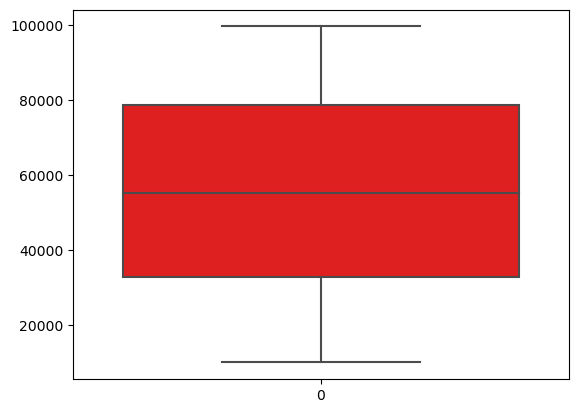

In [45]:
sn.boxplot(data['taxable_income'] , color = 'red' )

<Axes: xlabel='taxable_income', ylabel='Count'>

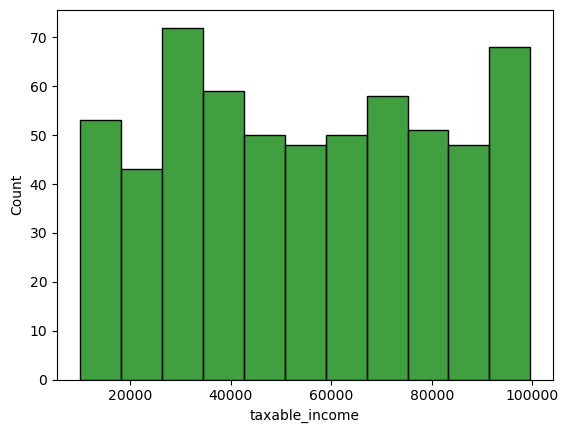

In [47]:
sn.histplot(data['taxable_income'] , color = 'green')

C:\Users\user\AppData\Local\Temp\ipykernel_2044\1610164303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['taxable_income'] , color = 'green')


<Axes: xlabel='taxable_income', ylabel='Density'>

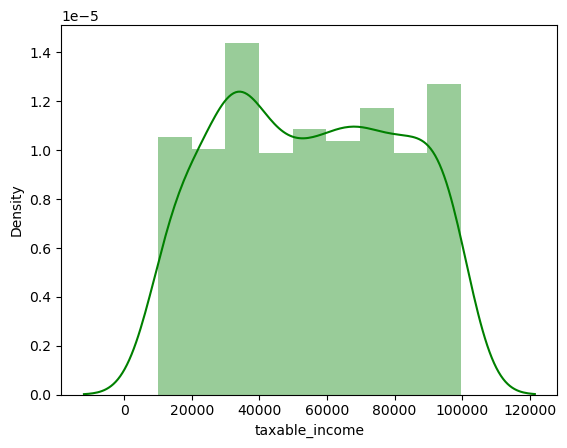

In [48]:
sn.distplot(data['taxable_income'] , color = 'green')

In [49]:
data.head(2)

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,Risk
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good


In [50]:
## Scatter plot between taxable_income and city_population

Text(0, 0.5, 'work_exp')

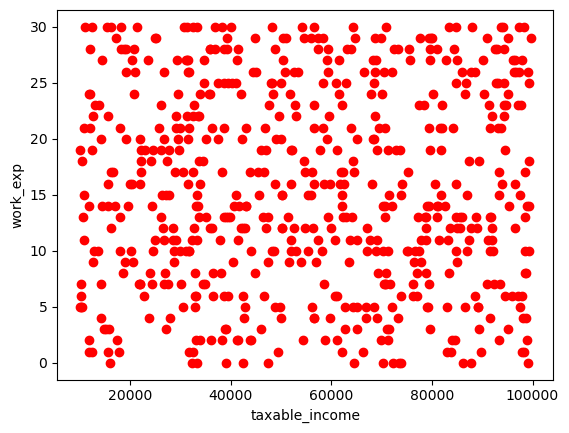

In [55]:
plt.scatter(x = 'taxable_income' , y = 'work_exp' , data = data , color = 'red')
plt.xlabel('taxable_income')
plt.ylabel('work_exp')

<Axes: >

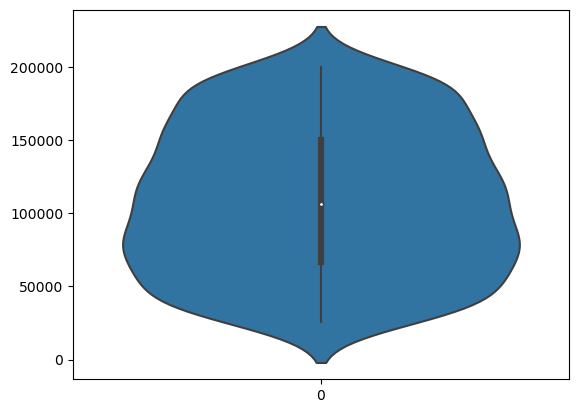

In [60]:
sn.violinplot(data['city_population'])

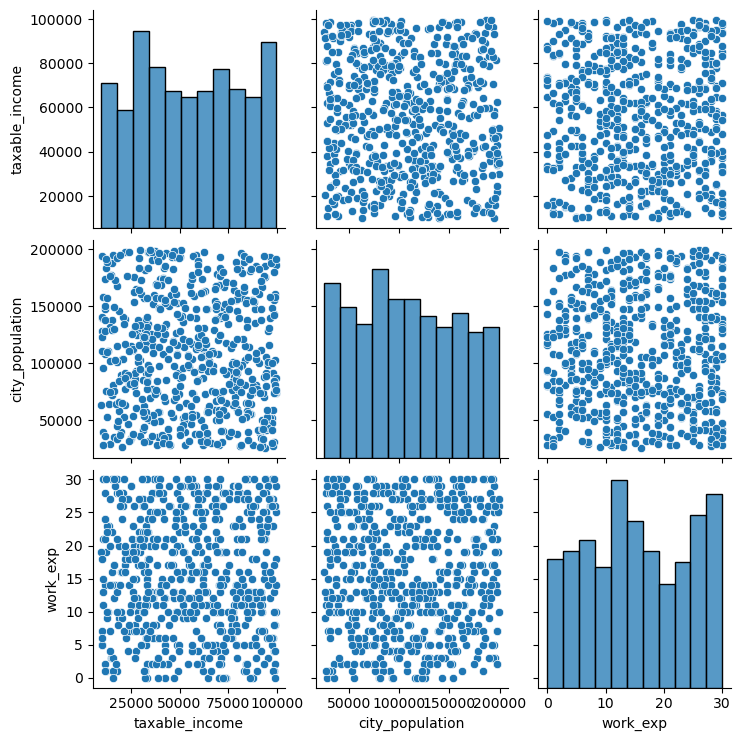

In [64]:
sn.pairplot(data )

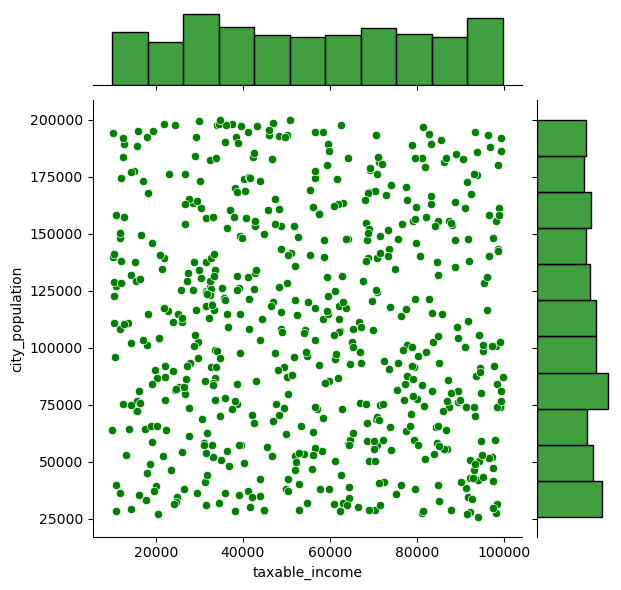

In [67]:
sn.jointplot(x = 'taxable_income' , y = 'city_population' , data = data , color = 'green' )